In [106]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import r2_score

In [107]:
batting_df = pd.read_csv('batting.csv')
batting_df

,Unnamed: 0,playerID,yearID,stintID,teamID,lgID,G,AB,R,H,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,157,youngdm01,2002,1,DET,AL,54,201,25,57,...,27,2,0,12,39,5,2,0,1,12
1,161,velarra01,2002,1,OAK,AL,56,133,22,30,...,8,3,0,15,32,1,5,1,1,4
2,162,tynerja01,2002,1,TBA,AL,44,168,17,36,...,9,7,1,7,19,0,1,3,1,1
3,163,thompry01,2002,1,MIL,NL,62,137,16,34,...,24,1,0,7,38,0,2,0,0,7
4,173,selbybi01,2002,1,CLE,AL,65,159,15,34,...,21,0,1,15,27,2,0,0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,1312,cordoma01,2002,1,BAL,AL,131,458,55,116,...,64,1,6,47,111,3,3,2,3,17
434,1313,singlch01,2002,1,BAL,AL,136,466,67,122,...,50,20,2,21,83,0,4,6,5,8
435,1314,hairsje02,2002,1,BAL,AL,122,426,55,114,...,32,21,6,34,55,0,7,8,4,5
436,1315,coninje01,2002,1,BAL,AL,116,451,44,123,...,63,8,0,25,66,6,2,0,10,10


In [108]:
batting_df = batting_df.loc[:, ['playerID', 'AB', 'R']]
batting_df

,playerID,AB,R
0,youngdm01,201,25
1,velarra01,133,22
2,tynerja01,168,17
3,thompry01,137,16
4,selbybi01,159,15
...,...,...,...
433,cordoma01,458,55
434,singlch01,466,67
435,hairsje02,426,55
436,coninje01,451,44


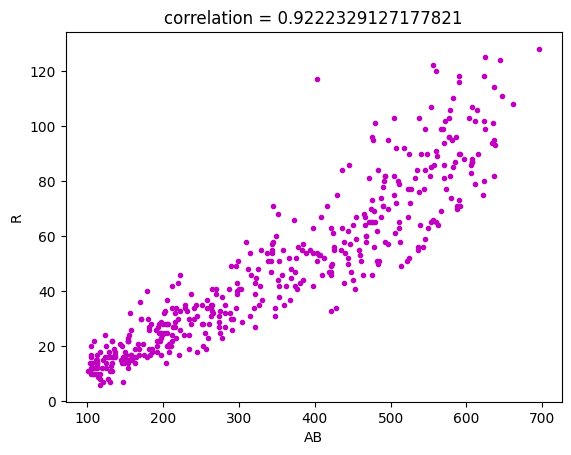

In [109]:
plt.scatter(batting_df['AB'], batting_df['R'], marker='.', c='m')
plt.xlabel('AB')
plt.ylabel('R')
plt.title(f"correlation = {batting_df['AB'].corr(batting_df['R'])}")
plt.show()

In [110]:
batting_df.loc[batting_df['R'] > 110, :].loc[batting_df['AB'] < 420, :]

,playerID,AB,R
37,bondsba01,403,117


In [111]:
batting_df['ratio'] = batting_df['R'] / batting_df['AB']
batting_df

,playerID,AB,R,ratio
0,youngdm01,201,25,0.124378
1,velarra01,133,22,0.165414
2,tynerja01,168,17,0.101190
3,thompry01,137,16,0.116788
4,selbybi01,159,15,0.094340
...,...,...,...,...
433,cordoma01,458,55,0.120087
434,singlch01,466,67,0.143777
435,hairsje02,426,55,0.129108
436,coninje01,451,44,0.097561


In [112]:
batting_df.nlargest(10, 'ratio')
batting_df.sort_values('ratio', ascending=False, inplace=True)
batting_df

,playerID,AB,R,ratio
37,bondsba01,403,117,0.290323
411,henderi01,179,40,0.223464
172,sosasa01,556,122,0.219424
408,giambja01,560,120,0.214286
77,paytoja01,170,36,0.211765
...,...,...,...,...
15,fletcda01,127,8,0.062992
108,benjami01,120,7,0.058333
426,fordybr01,130,7,0.053846
339,perezed02,117,6,0.051282


In [113]:
linear_model = ols('R ~ AB', data=batting_df).fit()
linear_model

In [114]:
linear_model.predict(batting_df['AB'])

37     57.324340
411    21.220258
172    81.984716
408    82.629432
77     19.769648
         ...    
15     12.838954
108    11.710701
426    13.322491
339    11.227164
22     16.062532
Length: 438, dtype: float64

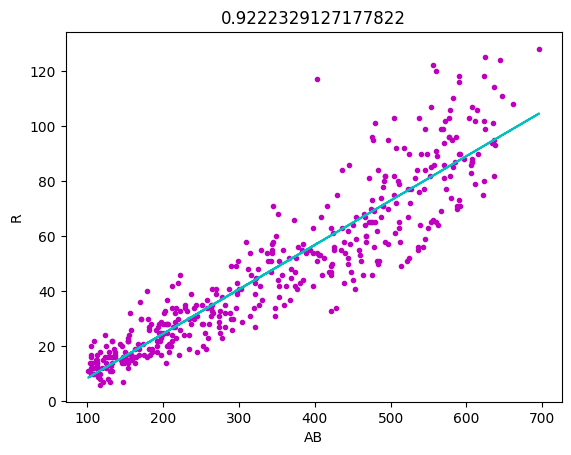

In [115]:
plt.scatter(batting_df['AB'], batting_df['R'], marker='.', c='m')
plt.xlabel('AB')
plt.ylabel('R')
plt.title(batting_df['AB'].corr(batting_df['R']))
plt.plot(batting_df['AB'], linear_model.predict(batting_df['AB']), c='c')
plt.show()

In [116]:
b1 = ((batting_df['AB'] - batting_df['AB'].mean()) * (batting_df['R'] - batting_df['R'].mean())).sum() / ((batting_df['AB'] - batting_df['AB'].mean())**2).sum()
b0 = batting_df['R'].mean() - b1 * batting_df['AB'].mean()
b0, b1

(-7.630770797657313, 0.16117893384458398)

In [117]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      R   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     2481.
Date:                Fri, 28 Jun 2024   Prob (F-statistic):          4.79e-182
Time:                        12:56:16   Log-Likelihood:                -1677.6
No. Observations:                 438   AIC:                             3359.
Df Residuals:                     436   BIC:                             3367.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.6308      1.243     -6.141      0.000     -10.073      -5.189
AB             0.1612      0.003     49.806      0.000       0.155       0.168
==============================================================================
Omnibus:                       55.206   Durbin-Watson:                   0.560
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.868
Skew:                           0.657   Prob(JB):                     1.04e-28
Kurtosis:                       5.309   Cond. No.                         894.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

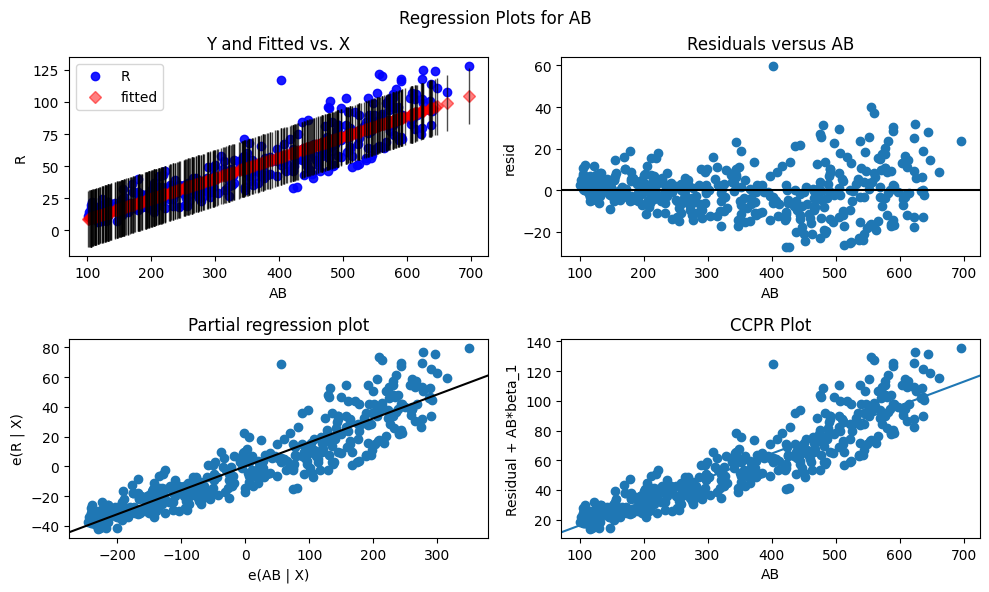

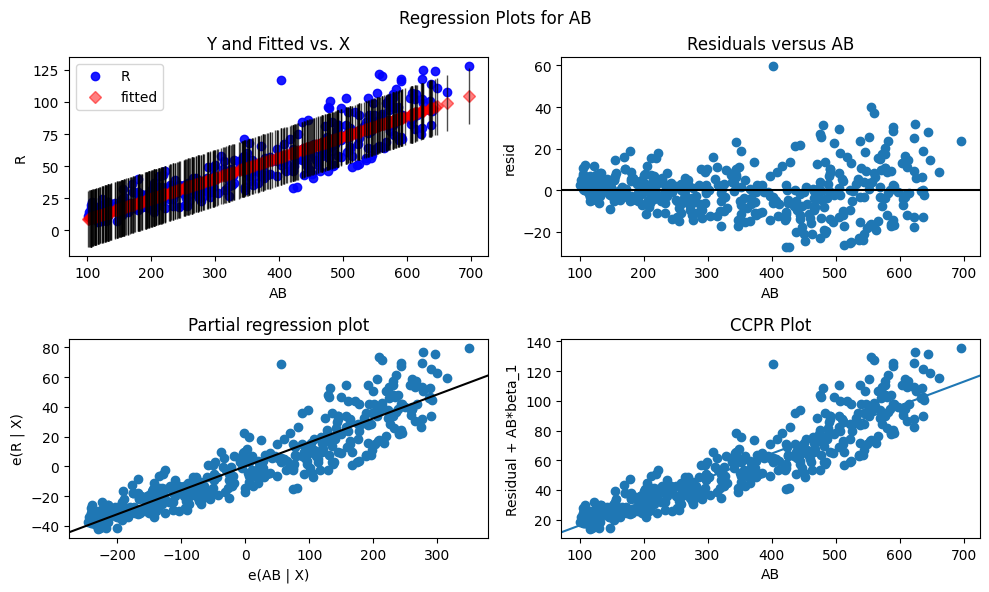

In [118]:
fig = plt.figure(figsize=(10, 6))
sm.graphics.plot_regress_exog(linear_model, 'AB', fig=fig)

In [119]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      R   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     2481.
Date:                Fri, 28 Jun 2024   Prob (F-statistic):          4.79e-182
Time:                        12:56:17   Log-Likelihood:                -1677.6
No. Observations:                 438   AIC:                             3359.
Df Residuals:                     436   BIC:                             3367.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.6308      1.243     -6.141      0.000     -10.073      -5.189
AB             0.1612      0.003     49.806      0.000       0.155       0.168
==============================================================================
Omnibus:                       55.206   Durbin-Watson:                   0.560
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.868
Skew:                           0.657   Prob(JB):                     1.04e-28
Kurtosis:                       5.309   Cond. No.                         894.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""